### Set up 

In [ ]:
%%bash
git clone https://github.com/partham16/ev_objdet_pc.git
cd ev_objdet_pc
pip uninstall -y tensorflow google-colab datascience fancyimpute
# pip install fastai==2.0.19 fastcore==1.3.2
make full_install

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
Uninstalling google-colab-1.0.0:
  Successfully uninstalled google-colab-1.0.0
Uninstalling datascience-0.10.6:
  Successfully uninstalled datascience-0.10.6
Uninstalling fancyimpute-0.4.3:
  Successfully uninstalled fancyimpute-0.4.3
pip install -q -U pip
pip install -q -r requirements_dev.txt
pre-commit install
pre-commit installed at .git/hooks/pre-commit
make precommit
make[1]: Entering directory '/content/ev_objdet_pc'
git add .
pre-commit run --all-files
[INFO] Initializing environment for https://github.com/pre-commit/pre-commit-hooks.
[INFO] Initializing environment for https://github.com/codespell-project/codespell.
[INFO] Installing environment for https://github.com/pre-commit/pre-commit-hooks.
[INFO] Once installed this environment will be reused.
[INFO] This may take a few minutes...
[INFO] Installing environment for https://github.com/codespell-project/codespell.
[INFO] Once installed this environm

Cloning into 'ev_objdet_pc'...
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

icevision 0.2.2.post2 requires fastcore<1.2,>=1.0.14, but you'll have fastcore 1.3.2 which is incompatible.
icevision 0.2.2.post2 requires requests>=2.24.0<3, but you'll have requests 2.23.0 which is incompatible.


### Code check

In [ ]:
%cd ev_objdet_pc/
!make check

/content/ev_objdet_pc
black src
reformatted /content/ev_objdet_pc/src/train.py
reformatted /content/ev_objdet_pc/src/mycocoparser.py
All done! ✨ 🍰 ✨
2 files reformatted, 4 files left unchanged.
isort src
Fixing /content/ev_objdet_pc/src/mycocoparser.py
Fixing /content/ev_objdet_pc/src/train.py
flake8 src --ignore=E501
mypy src --ignore-missing-imports
Success: no issues found in 6 source files
git add .
pre-commit run --all-files
Trim Trailing Whitespace.................................................Passed
Fix End of Files.........................................................Passed
Check Yaml...............................................................Passed
Check for added large files..............................................Passed
Check python ast.........................................................Passed
Check JSON...........................................(no files to check)Skipped
codespell................................................................Passed
git ad

#### Quick run : `python ev_train.py`

> run this in console instead of this jupyter notebook to train the model

In [ ]:
# !python ev_train.py

### Training

#### get imports and update num of epochs
> from `10` & `30` to `3` & `5` (just to demo)

In [ ]:
from icevision.all import *

In [ ]:
from src import Trainer, Config

In [ ]:
Config.num_freeze_epochs = 3
Config.num_postfreeze_epochs = 5
Config.model_savepath = f"./models/{Config.model_savename}_epochs-{Config.num_freeze_epochs}-{Config.num_postfreeze_epochs}.pth"
print(Config.num_freeze_epochs, Config.num_postfreeze_epochs)

3 5


In [ ]:
Config.model_savepath

'./models/fasterrcnn_r50_fpn_coco_epochs-3-5.pth'

#### prep trainer (holds the data and transforms, and the learner)

In [ ]:
trainer = Trainer()

  0%|          | 0/2239 [00:00<?, ?it/s]

100%|██████████| 2239/2239 [00:35<00:00, 63.28it/s]


Skipped 42 out of 2239 images


INFO     - Autofixing records | icevision.parsers.parser:parse:124



#records(train) : 1757, #records(valid) : 440


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


#### train data samples

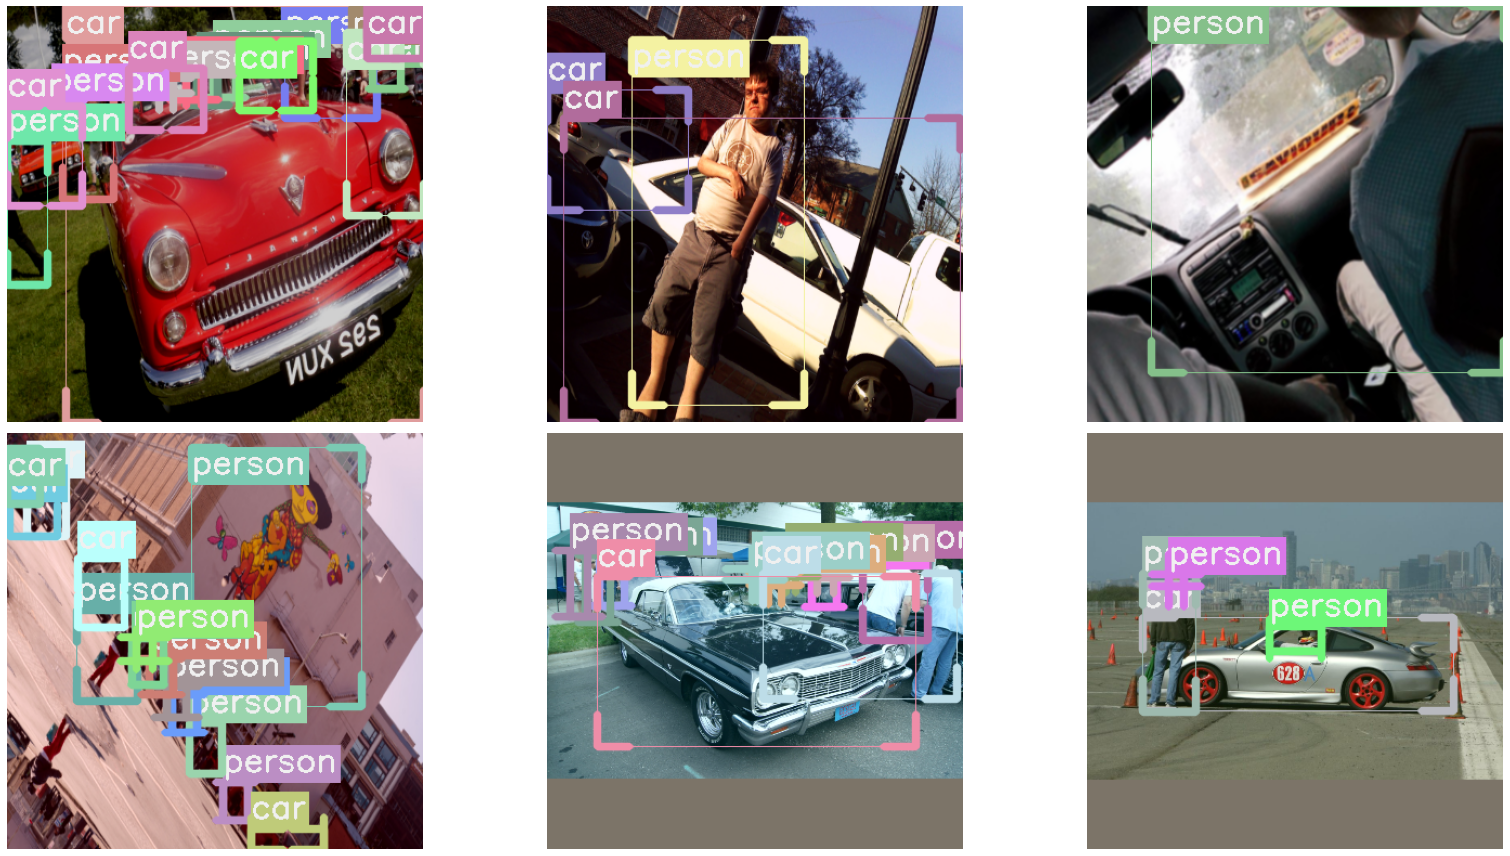

In [ ]:
batch, samples = first(trainer.train_dl)
show_samples(samples[:6], class_map=trainer.class_map, ncols=3)

#### fine tune

In [ ]:
trainer.fine_tune()

epoch,train_loss,valid_loss,COCOMetric,time
0,1.302467,0.999940,0.182803,02:01
1,1.048737,0.858905,0.224488,01:55
2,0.981034,0.843134,0.252641,01:56


epoch,train_loss,valid_loss,COCOMetric,time
0,0.821300,0.734151,0.261307,03:02
1,0.771847,0.714917,0.265809,02:57
2,0.773056,0.710244,0.268286,02:57
3,0.743904,0.693276,0.275203,02:57
4,0.733867,0.690894,0.277160,02:57


#### validation samples

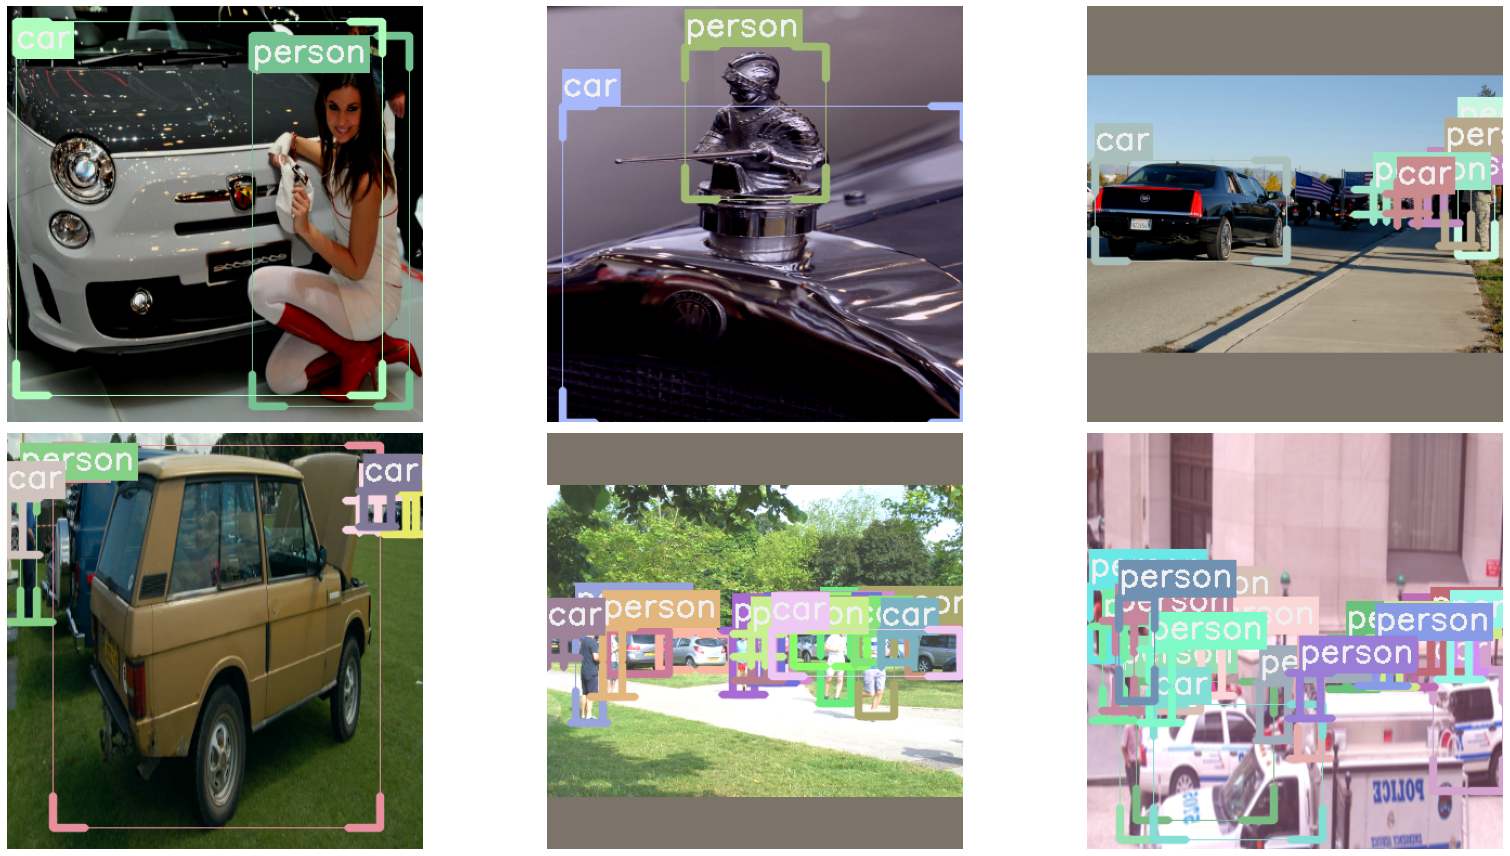

In [ ]:
samples, preds = trainer.infer_valid()

# Show samples
imgs = [sample["img"] for sample in samples]
show_preds(
    samples=imgs[:6],
    preds=preds[:6],
    class_map=trainer.class_map,
    denormalize_fn=denormalize_imagenet,
    ncols=3,
)

#### save model

In [ ]:
trainer.save_model()